In [2]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#reading the file
car = pd.read_csv('automobile.txt')
car.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [4]:
#understanding the data set
car.info()
car.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
#Understanding missing values
print('\nMissing values    :',car.isnull().values.sum())



Missing values    : 0


In [6]:
#looking at number of unique values per each field
car.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

Although missing values in above code shows as zero, the below code shows "?"

In [7]:
df = car[car['horsepower']=='?']
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


#### Reviewing the data by using the methods above, the below fields seem to have "?" character. So replacing it with mean values:
horsepower

peak-rpm

normalized-losses

bore	

stroke

price

#### The "num-of-doors" column is replaced with "four" doors as most of the cars seem to have four doors


In [8]:
#horspower
df_temp = car[car['horsepower']!='?']
normalised_mean = df_temp['horsepower'].astype(int).mean()
car['horsepower'] = car['horsepower'].replace('?',normalised_mean).astype(int)

#stroke
df_temp = car[car['stroke']!='?']
normalised_mean = df_temp['stroke'].astype(float).mean()
car['stroke'] = car['stroke'].replace('?',normalised_mean).astype(float)

#price
df_temp = car[car['price']!='?']
normalised_mean = df_temp['price'].astype(int).mean()
car['price'] = car['price'].replace('?',normalised_mean).astype(int)

# peak-rpm
df_temp = car[car['peak-rpm']!='?']
normalised_mean = df_temp['peak-rpm'].astype(int).mean()
car['peak-rpm'] = car['peak-rpm'].replace('?',normalised_mean).astype(int)

# normalized losses
df_temp = car[car['normalized-losses']!='?']
normalised_mean = df_temp['normalized-losses'].astype(int).mean()
car['normalized-losses'] = car['normalized-losses'].replace('?',normalised_mean).astype(int)

# bore
df_temp = car[car['bore']!='?']
normalised_mean = df_temp['bore'].astype(float).mean()
car['bore'] = car['bore'].replace('?',normalised_mean).astype(float)

#num-of-doors
car['num-of-doors'] = car['num-of-doors'].replace('?','four')

In [9]:
car.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,13207


A number of columns doesnt seem necessary for the rest of data analysis, so dropping them!

In [10]:
car.drop(['symboling','normalized-losses','aspiration','engine-location','wheel-base','fuel-system','bore','stroke','compression-ratio'], axis = 1, inplace = True)

In [11]:
#Check if any duplicate rows
car.duplicated().sum()

1

In [12]:
#removing that duplicate row
car = car.drop_duplicates()

Describing and Transposing objects

In [13]:
car.describe(include=['object']).T

,count,unique,top,freq
make,204,22,toyota,32
fuel-type,204,2,gas,184
num-of-doors,204,2,four,115
body-style,204,5,sedan,95
drive-wheels,204,3,fwd,119
engine-type,204,7,ohc,147
num-of-cylinders,204,7,four,158


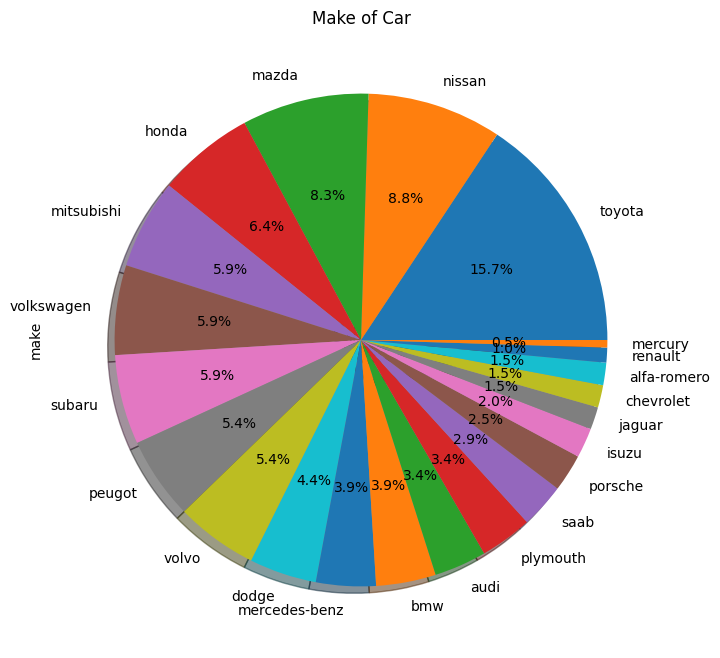

In [14]:
f,ax=plt.subplots(figsize=(15,8))
car['make'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title('Make of Car')

plt.show()

Observation: Toyota has the maximum number while Mercury has the least number of cars in the market

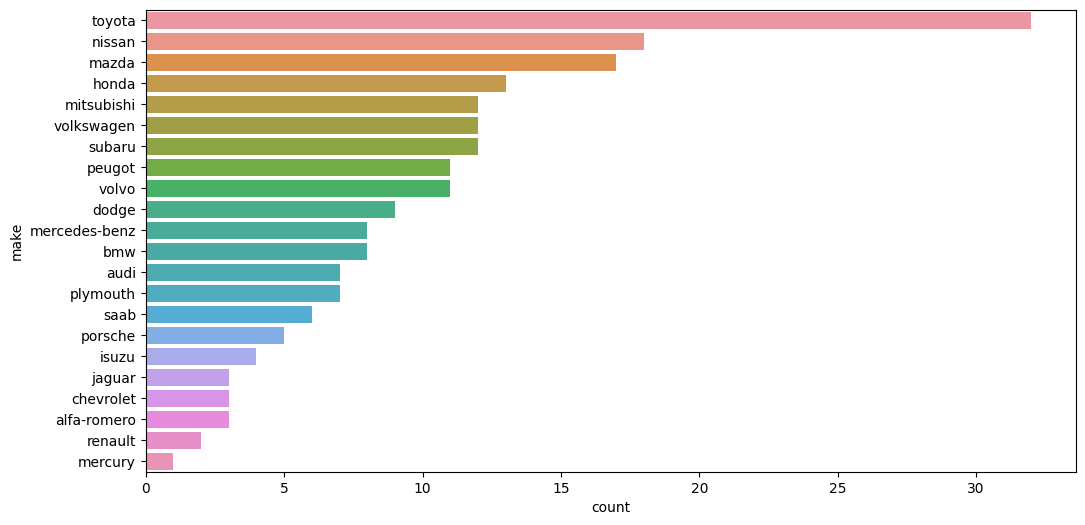

In [15]:
#Count of most cars by make
fig = plt.figure(figsize=(12,6))
sns.countplot(y=car['make'], data=car,order = car['make'].value_counts().index);

Observation: Toyota has the maximum number while Mercury has the least number of cars in the market

<function matplotlib.pyplot.show(close=None, block=None)>

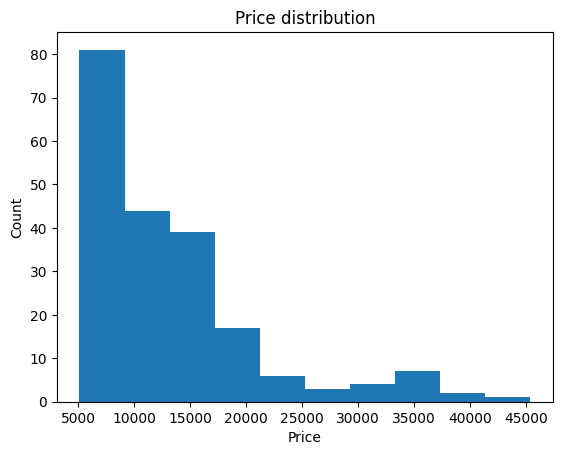

In [16]:
#check the distribution of price
plt.hist(car['price'])
plt.ylabel("Count")
plt.xlabel("Price")
plt.title("Price distribution")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

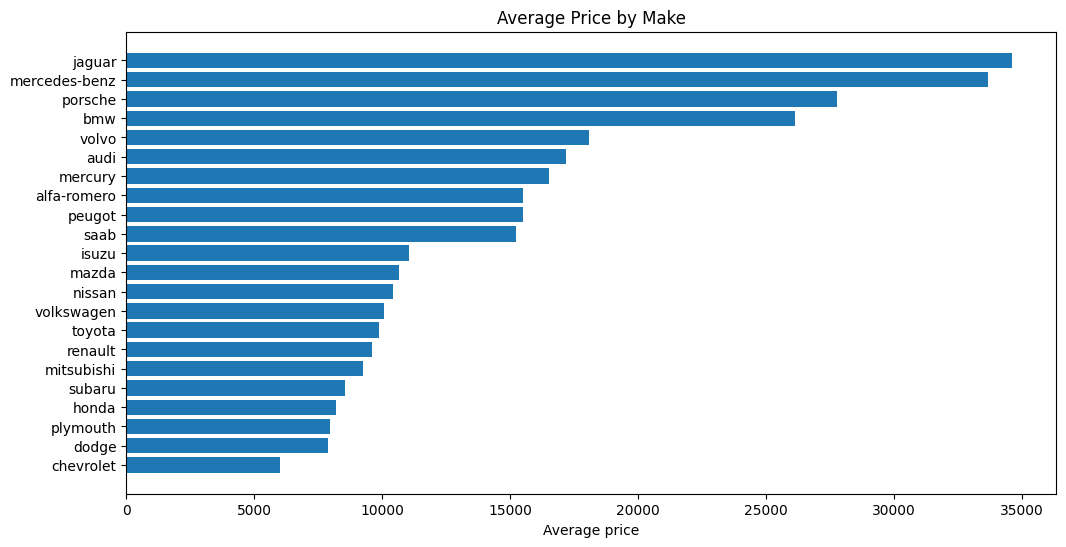

In [17]:
#Average price given make
make_avg_p = car.groupby(by=['make'])['price'].mean().reset_index()
sort_p = make_avg_p.sort_values('price', ascending=True)

plt.figure(figsize=(12,6))
plt.barh(sort_p['make'], sort_p['price'])
plt.xlabel("Average price")
plt.title("Average Price by Make")
plt.show
#Jaguar seems to have a few cars in terms of count but highest average price

Observations: 1) Checking the distribution of cars by Price: Most of the cars are priced around 21k mark, while a few numbers of cars are in the higher price range from 21k to 45k

2) Jaguar seems to have a few cars in terms of count but highest average price


In [18]:
#Top 10 most expensive cars by make
#Also explored the body type, mostly Sedan
car[['make', 'body-style', 'price']].sort_values('price', ascending=False).head(10)

,make,body-style,price
74,mercedes-benz,hardtop,45400
16,bmw,sedan,41315
73,mercedes-benz,sedan,40960
128,porsche,convertible,37028
17,bmw,sedan,36880
49,jaguar,sedan,36000
48,jaguar,sedan,35550
72,mercedes-benz,convertible,35056
71,mercedes-benz,sedan,34184
127,porsche,hardtop,34028


In [19]:
#Top 10 most cheapest cars by make and body type
#we see more hatchbacks
car[['make', 'body-style', 'price']].sort_values('price', ascending=True).head(10)

,make,body-style,price
138,subaru,hatchback,5118
18,chevrolet,hatchback,5151
50,mazda,hatchback,5195
150,toyota,hatchback,5348
76,mitsubishi,hatchback,5389
32,honda,hatchback,5399
89,nissan,sedan,5499
118,plymouth,hatchback,5572
21,dodge,hatchback,5572
51,mazda,hatchback,6095


<function matplotlib.pyplot.show(close=None, block=None)>

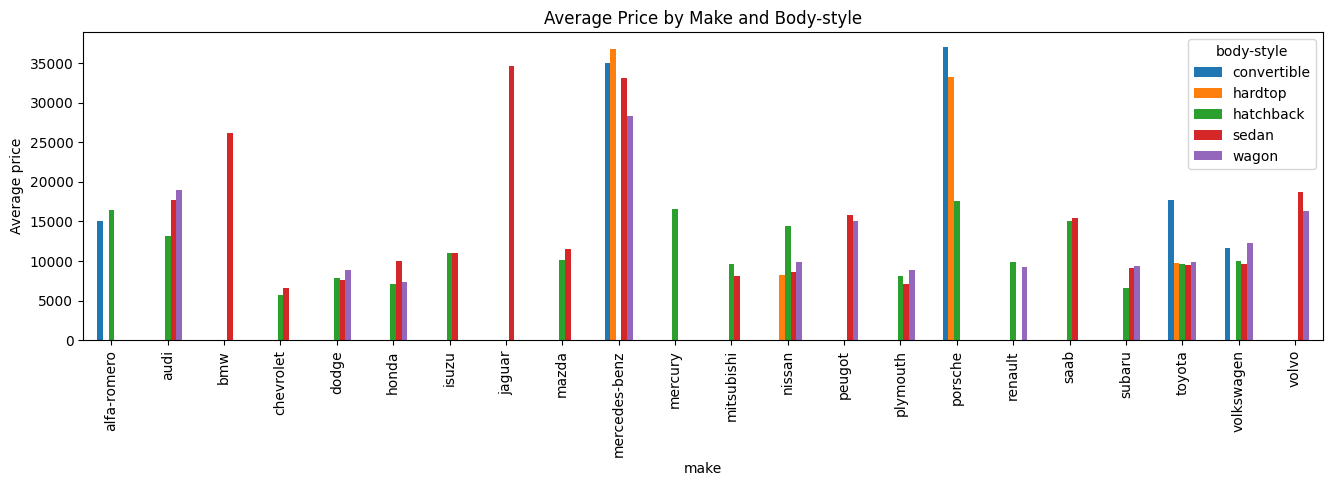

In [20]:
make_body = car.groupby(by=['make','body-style'])['price'].mean().reset_index()
make_body.pivot(index='make',values='price',columns='body-style').plot(kind='bar',figsize=(16,4))
plt.ylabel("Average price")
plt.title("Average Price by Make and Body-style")
plt.show

Based on above data alone:

1) Merc, Porsche, BMW and Jaguar are most expensive across all bodystyles

2) Generally, convertibles have a relatively higher price

3) Some manufacturers are specializing in certain bodystyles only to develop a "niche" - e.g., Jaguar and BMW on sedans (at relatively higer prices) and Mercury on hatchbacks

4) Toyota appears to be having cars across all bodystyles with relatively similar price range (barring convertibles) - indicates that their goal is to provide widest choice to customers at a relatively smaller price range

## CORRELATION

<function matplotlib.pyplot.show(close=None, block=None)>

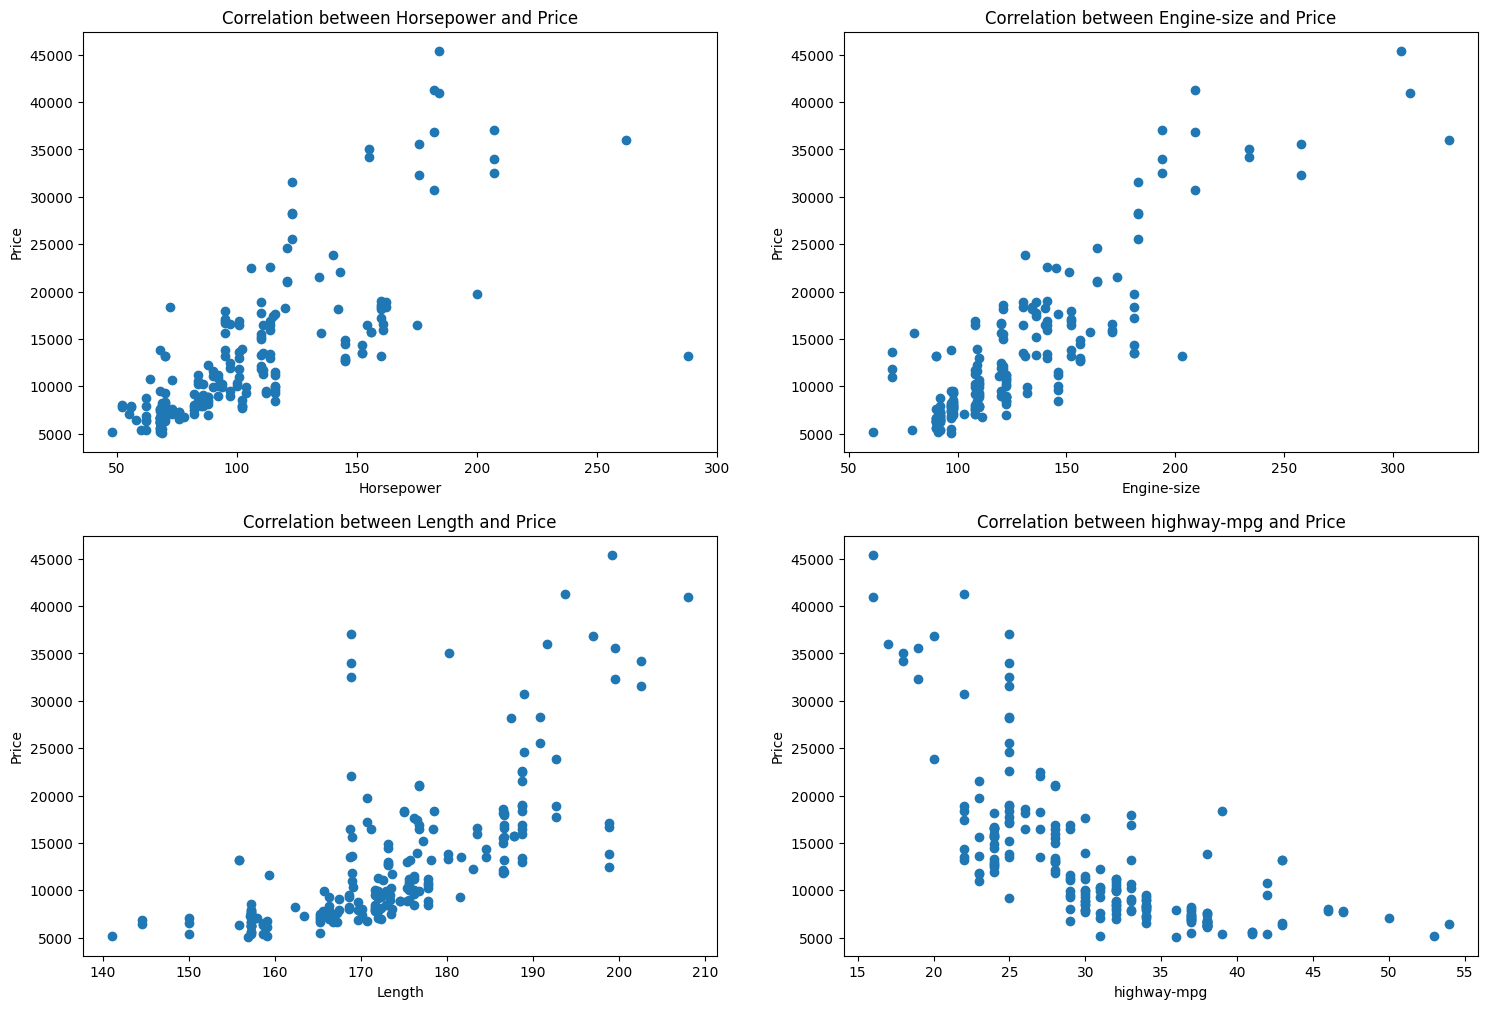

In [21]:
plt.figure(figsize=(18,12))
plt.subplot(2, 2, 1)
plt.scatter(car['horsepower'], car['price'])
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Correlation between Horsepower and Price")
plt.show

plt.subplot(2, 2, 2)
plt.scatter(car['engine-size'], car['price'])
plt.xlabel("Engine-size")
plt.ylabel("Price")
plt.title("Correlation between Engine-size and Price")
plt.show

plt.subplot(2, 2, 3)
plt.scatter(car['length'], car['price'])
plt.xlabel("Length")
plt.ylabel("Price")
plt.title("Correlation between Length and Price")
plt.show

plt.subplot(2, 2, 4)
plt.scatter(car['highway-mpg'], car['price'])
plt.xlabel("highway-mpg")
plt.ylabel("Price")
plt.title("Correlation between highway-mpg and Price")
plt.show

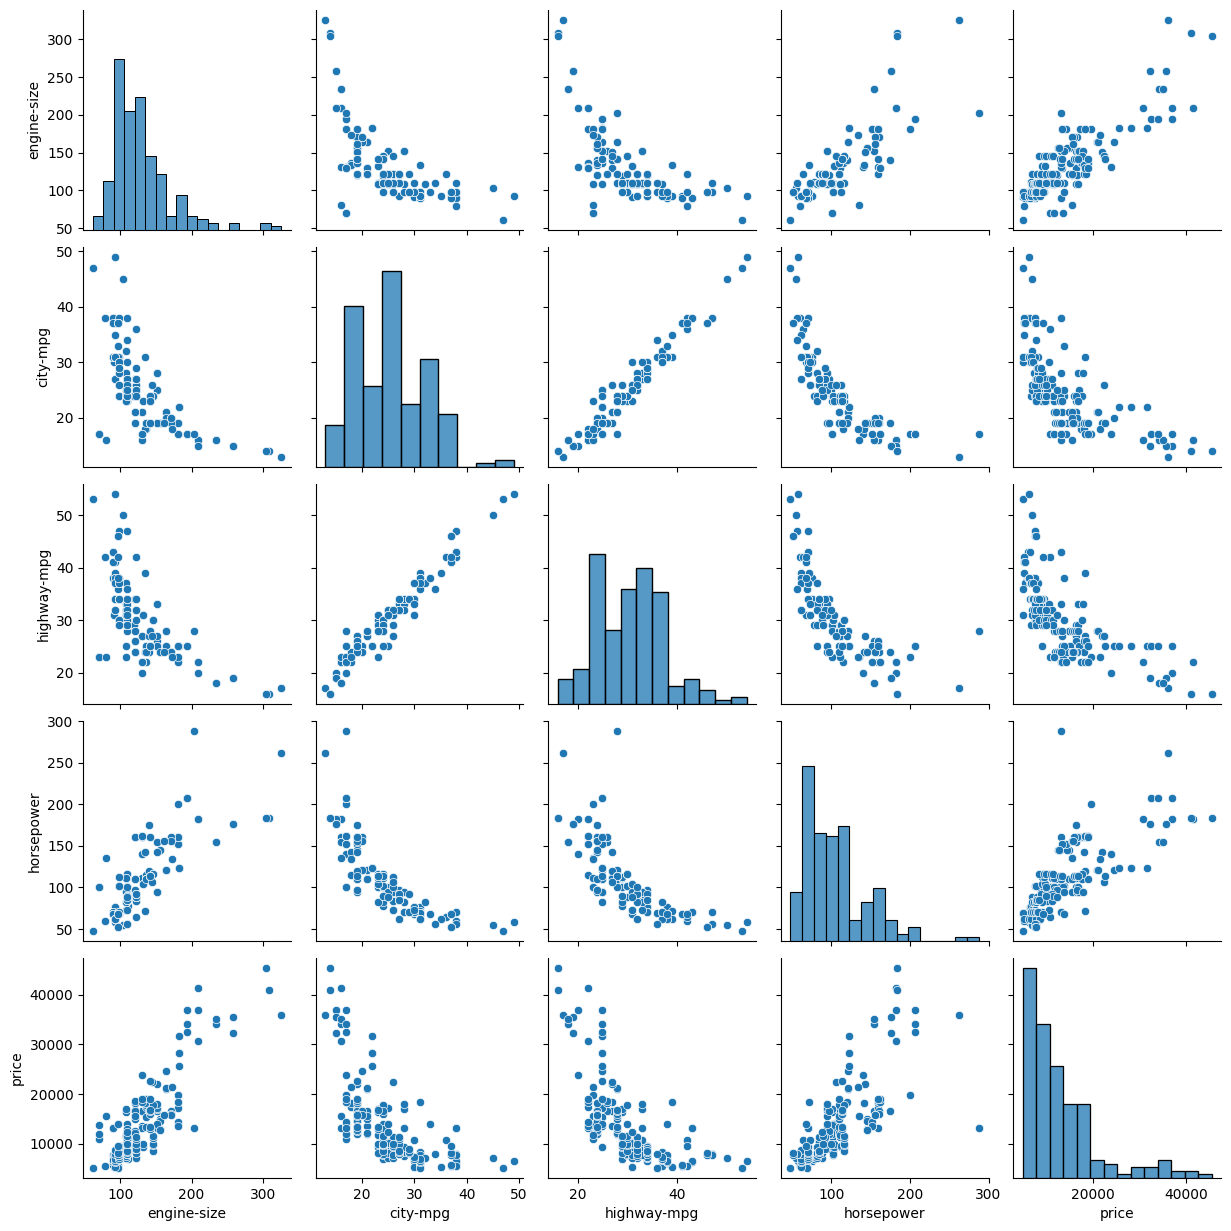

In [22]:
sns.pairplot(car[['engine-size','body-style','city-mpg','highway-mpg','horsepower','price']])

Based on the above:

1) More expensive cars are not fuel efficient, however the data could be skewed due to "supercars" i.e., extremely high priced cars

2) Length and Price -  have a positive correlation at 0.68 per heatmap below and per the scatterplot above.

3) Engine size and price -  has a strong correlation at 0.86 per heatmap below and per the scatterplot above.

4) Horsepower and price - as a strong correlation at 0.76 per heatmap below and per the scatterplot above.

<AxesSubplot: >

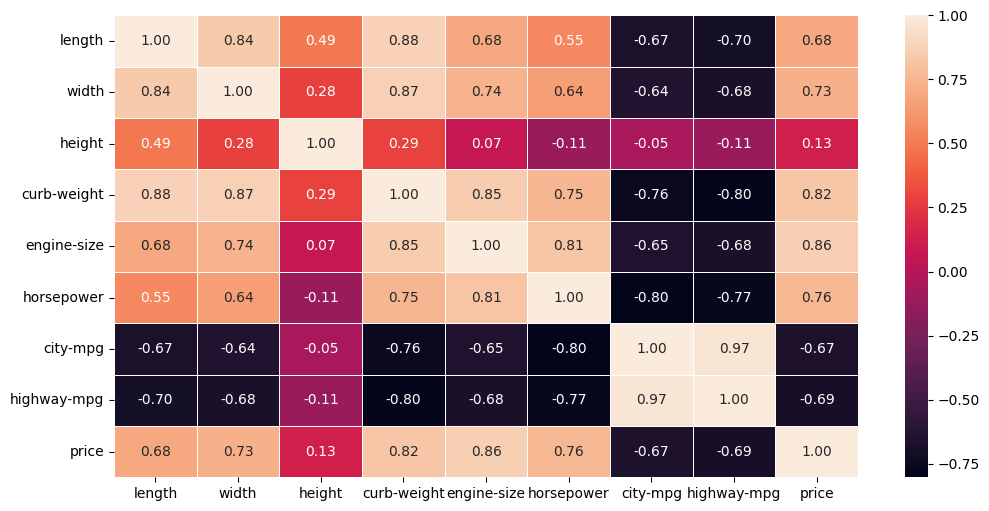

In [23]:
plt.figure(figsize=(12,6))
cols = ['length','width','height','curb-weight','engine-size','horsepower','city-mpg','highway-mpg','price']
sns.heatmap(car[cols].corr(), annot=True, fmt='.2f', linewidths=.5)

Observations from above heatmap:

Strong correlation: Car price is strongly correlated with length, width, curb-weight, engine-size, horsepower.

Strong correlation: Car price is strongly correlated with city-mpg, highway-mpg.